In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, StratifiedKFold
sns.set_style("darkgrid")
pd.options.mode.chained_assignment = None  # default='warn'


Importing Dataset


In [2]:
data = pd.read_csv("adult.csv", header=0)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.shape

(48842, 15)

In [4]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB



Exploratory Data Analysis


In [6]:
data.describe().T #To view the statistical characteristics of the numerical feature set 

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [7]:
data.describe(include="object").T #To view the statistical characteristics of the categorical feature set 

,count,unique,top,freq
workclass,48842,9,Private,33906
education,48842,16,HS-grad,15784
marital-status,48842,7,Married-civ-spouse,22379
occupation,48842,15,Prof-specialty,6172
relationship,48842,6,Husband,19716
race,48842,5,White,41762
sex,48842,2,Male,32650
native-country,48842,42,United-States,43832
income,48842,2,<=50K,37155


In [8]:
font = {'family' : 'DejaVu Sans',
        'size'   : 10}
plt.rc('font', **font)

Text(-9.075000000000003, 0.5, 'count')

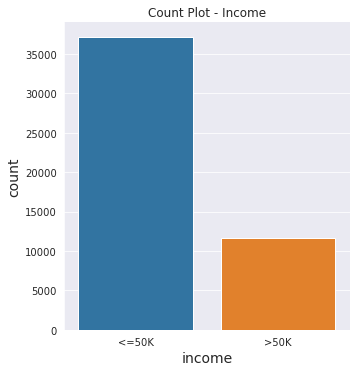

In [9]:
sns.catplot(data=data, x="income", kind="count", palette= 'tab10', height=5, aspect=1)
plt.title('Count Plot - Income')
plt.xlabel('income', fontsize=14)
plt.ylabel('count', fontsize=14)

Text(10.050000000000004, 0.5, 'age')

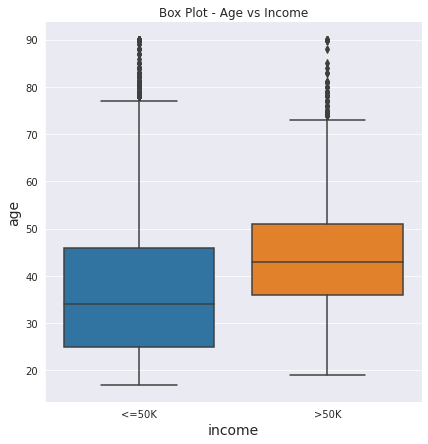

In [10]:
sns.catplot(data=data, x="income", y="age", kind="box", palette= 'tab10',height=6, aspect=1)
plt.title('Box Plot - Age vs Income')
plt.xlabel('income', fontsize=14)
plt.ylabel('age', fontsize=14)

Text(6.800000000000004, 0.5, 'fnlwgt')

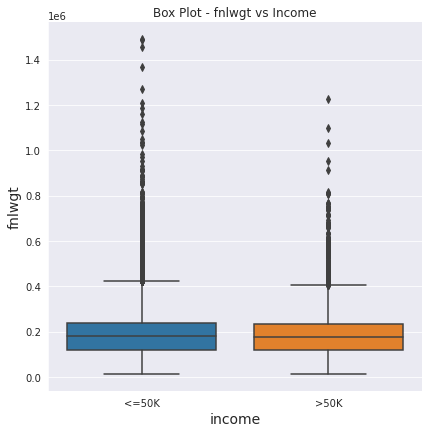

In [11]:
sns.catplot(data=data, x="income", y="fnlwgt", kind="box", palette= 'tab10', height=6, aspect=1)
plt.title('Box Plot - fnlwgt vs Income')
plt.xlabel('income', fontsize=14)
plt.ylabel('fnlwgt', fontsize=14)

Text(10.050000000000004, 0.5, 'education-num')

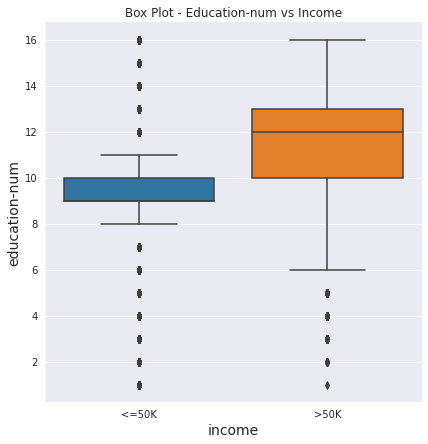

In [12]:
sns.catplot(data=data, x="income", y="education-num", kind="box", palette= 'tab10', height=6, aspect=1)
plt.title('Box Plot - Education-num vs Income')
plt.xlabel('income', fontsize=14)
plt.ylabel('education-num', fontsize=14)

Text(-15.449999999999996, 0.5, 'capital-gain')

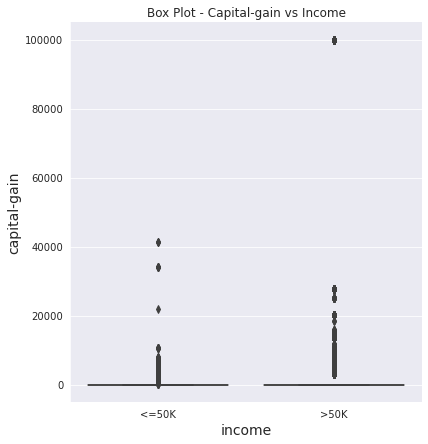

In [13]:
sns.catplot(data=data, x="income", y="capital-gain", kind="box", palette= 'tab10', height=6, aspect=1)
plt.title('Box Plot - Capital-gain vs Income')
plt.xlabel('income', fontsize=14)
plt.ylabel('capital-gain', fontsize=14)

Text(-2.6999999999999957, 0.5, 'capital-loss')

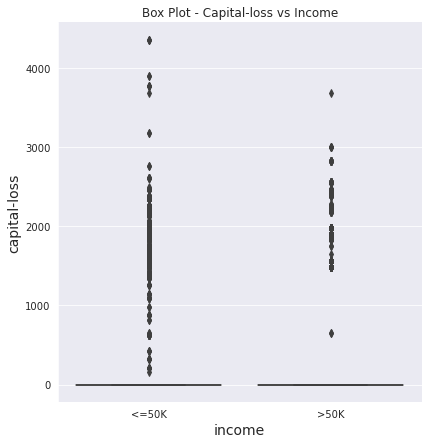

In [14]:
sns.catplot(data=data, x="income", y="capital-loss", kind="box", palette= 'tab10', height=6, aspect=1)
plt.title('Box Plot - Capital-loss vs Income')
plt.xlabel('income', fontsize=14)
plt.ylabel('capital-loss', fontsize=14)

Text(3.6750000000000043, 0.5, 'hours-per-week')

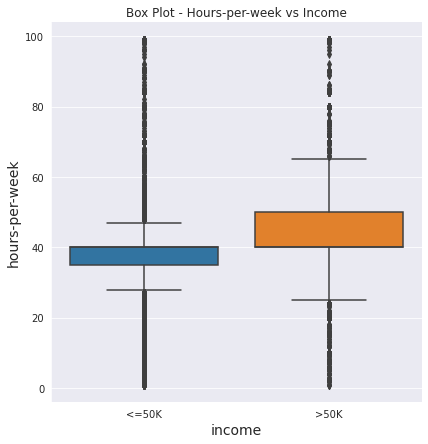

In [15]:
sns.catplot(data=data, x="income", y="hours-per-week", kind="box", palette= 'tab10', height=6, aspect=1)
plt.title('Box Plot - Hours-per-week vs Income')
plt.xlabel('income', fontsize=14)
plt.ylabel('hours-per-week', fontsize=14)

Text(26.09703776041667, 0.5, 'count')

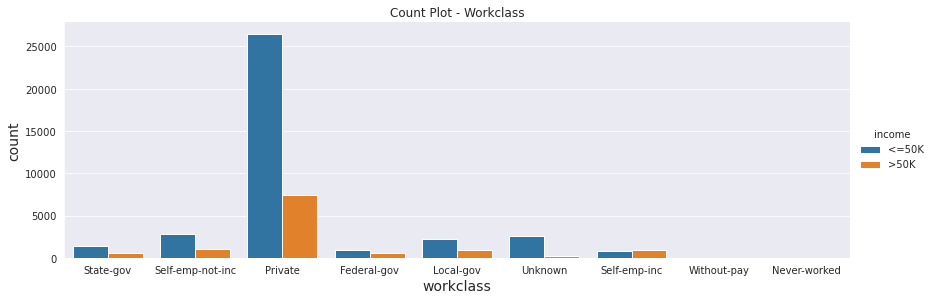

In [16]:
sns.catplot(x='workclass', data=data, kind='count', hue="income", palette= 'tab10',  height=4, aspect=3)
plt.title('Count Plot - Workclass')
plt.xlabel('workclass', fontsize=14)
plt.ylabel('count', fontsize=14)

Text(24.772778320312497, 0.5, 'count')

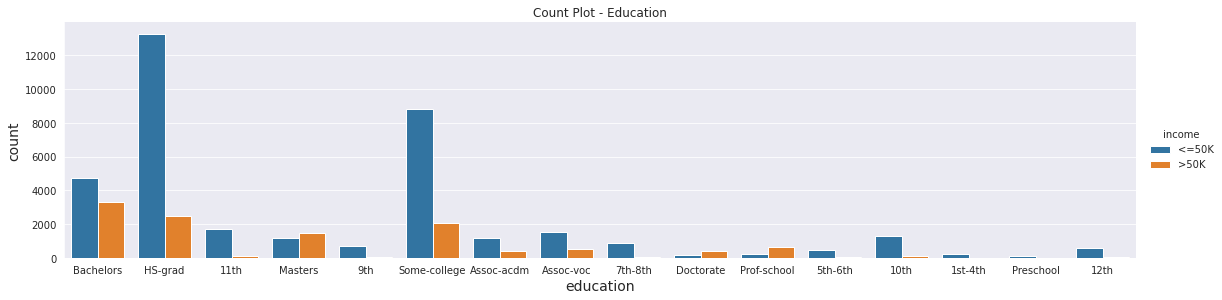

In [17]:
sns.catplot(x='education', data=data, kind='count', hue="income", palette= 'tab10',  height=4, aspect=4)
plt.title('Count Plot - Education')
plt.xlabel('education', fontsize=14)
plt.ylabel('count', fontsize=14)

Text(26.09703776041667, 0.5, 'count')

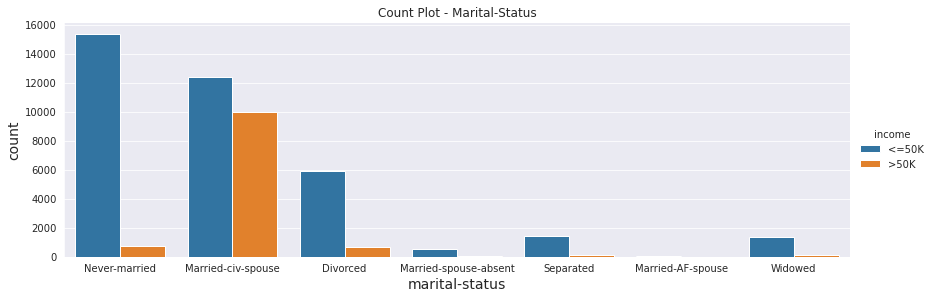

In [18]:
sns.catplot(x='marital-status', data=data, kind='count', hue="income", palette= 'tab10',  height=4, aspect=3)
plt.title('Count Plot - Marital-Status')
plt.xlabel('marital-status', fontsize=14)
plt.ylabel('count', fontsize=14)

Text(23.977806712962966, 0.5, 'count')

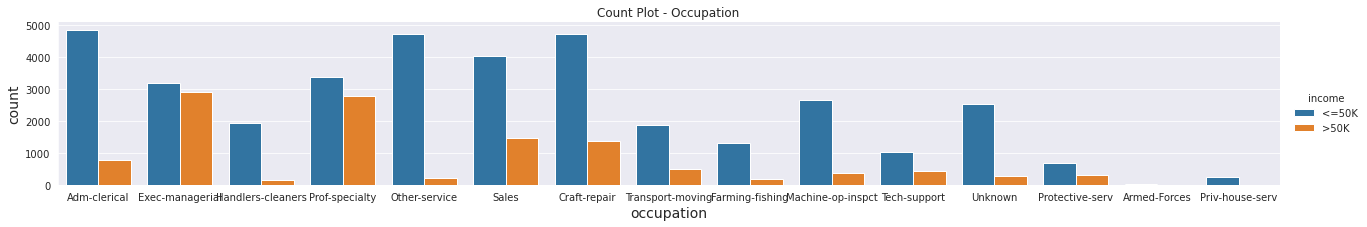

In [19]:
sns.catplot(x='occupation', data=data, kind='count', hue="income", palette= 'tab10',  height=3, aspect=6)
plt.title('Count Plot - Occupation')
plt.xlabel('occupation', fontsize=14)
plt.ylabel('count', fontsize=14)

Text(26.09703776041667, 0.5, 'count')

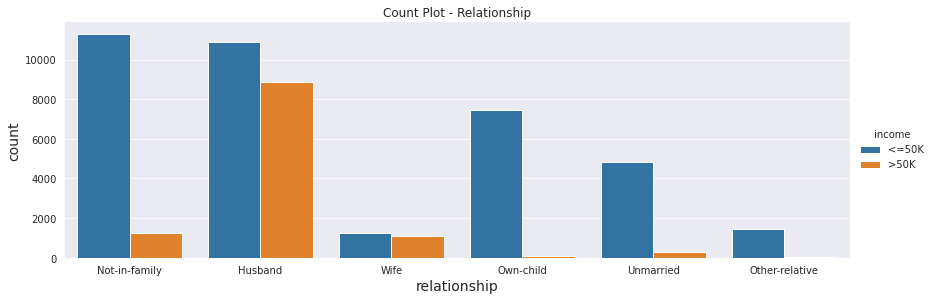

In [20]:
sns.catplot(x='relationship', data=data, kind='count', hue="income", palette= 'tab10',  height=4, aspect=3)
plt.title('Count Plot - Relationship')
plt.xlabel('relationship', fontsize=14)
plt.ylabel('count', fontsize=14)

Text(26.09703776041667, 0.5, 'count')

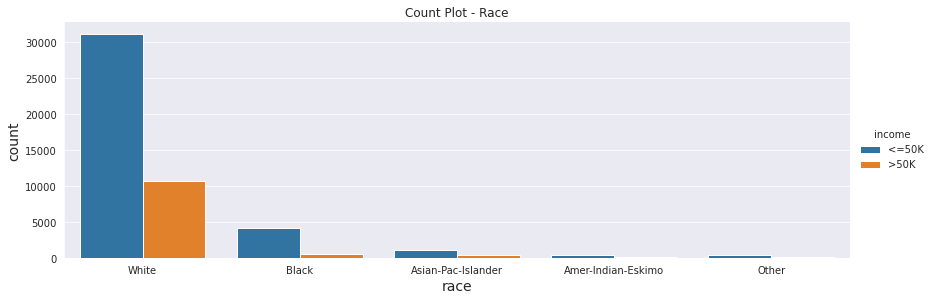

In [21]:
sns.catplot(x='race', data=data, kind='count', hue="income", palette= 'tab10',  height=4, aspect=3)
plt.title('Count Plot - Race')
plt.xlabel('race', fontsize=14)
plt.ylabel('count', fontsize=14)

Text(28.745556640624997, 0.5, 'count')

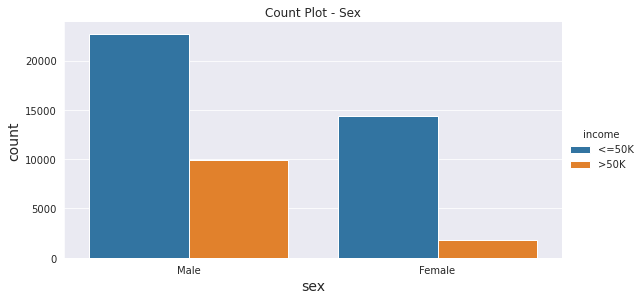

In [22]:
sns.catplot(x='sex', data=data, kind='count', hue="income", palette= 'tab10',  height=4, aspect=2)
plt.title('Count Plot - Sex')
plt.xlabel('sex', fontsize=14)
plt.ylabel('count', fontsize=14)

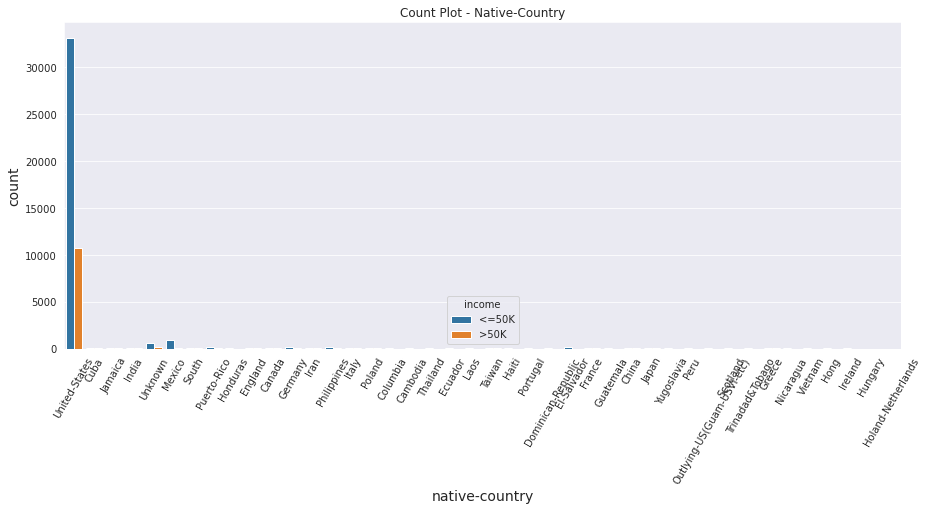

In [23]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='native-country', data=data, hue="income", palette= 'tab10')
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.title('Count Plot - Native-Country')
plt.xlabel('native-country', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.show()


Feature Engineering


In [24]:
data.loc[data["native-country"] != "United-States", "native-country"] = 'Not United-States'

data['capital-gain']= np.sqrt(data['capital-gain'])
data['capital-loss']= np.sqrt(data['capital-loss'])


Data Preprocessing


In [25]:
label_income = LabelEncoder() # Label encoding target column i.e., categorical to numerical representation
data['income'] = label_income.fit_transform(data['income'])
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,46.626173,0.0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40,Not United-States,0


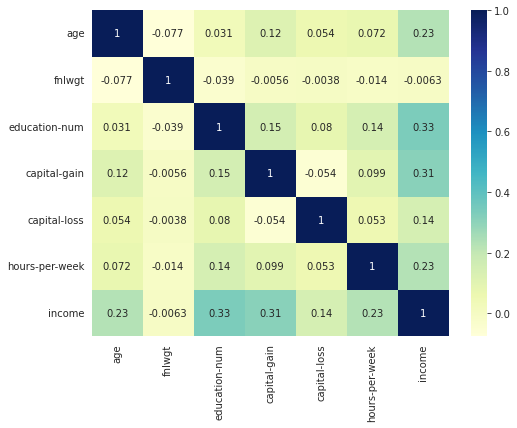

In [26]:
plt.figure(figsize=(8,6))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) 
# Correlation plot showing the correlation between continuous features and the target label

In [27]:
x = data.drop(['income', 'education'], axis = 1) # feature matrix
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  int64  
 3   education-num   48842 non-null  int64  
 4   marital-status  48842 non-null  object 
 5   occupation      48842 non-null  object 
 6   relationship    48842 non-null  object 
 7   race            48842 non-null  object 
 8   sex             48842 non-null  object 
 9   capital-gain    48842 non-null  float64
 10  capital-loss    48842 non-null  float64
 11  hours-per-week  48842 non-null  int64  
 12  native-country  48842 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 4.8+ MB


In [28]:
y = data['income'] # target series
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 48842 entries, 0 to 48841
Series name: income
Non-Null Count  Dtype
--------------  -----
48842 non-null  int32
dtypes: int32(1)
memory usage: 190.9 KB


In [29]:
ordinal_features = ['age', 'education-num', 'hours-per-week']  # Pipeline for column transformation using scaling and encoding
numeric_features = ['fnlwgt','capital-gain', 'capital-loss']
categorical_features = ['workclass', 'marital-status','occupation', 'relationship','race', 'sex','native-country']

ordinal_transformer = make_pipeline(
     SimpleImputer(strategy="mean"),
     MinMaxScaler()
)

numeric_transformer = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler()
)

categorical_transformer= make_pipeline(
    SimpleImputer(strategy="constant", fill_value="Unknown"),
    OneHotEncoder(drop="if_binary", handle_unknown="ignore")
)

col_transformer = make_column_transformer(
    (ordinal_transformer, ordinal_features),
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features),
    remainder='passthrough', sparse_threshold=0
)

col_transformer.fit(x)

ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['age', 'education-num', 'hours-per-week']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['fnlwgt', 'capital-gain', 'capital-loss']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
            

In [30]:
onehot_cols = (
    col_transformer
    .named_transformers_["pipeline-3"]
    .named_steps["onehotencoder"]
    .get_feature_names_out(categorical_features)
)

columns = ordinal_features + numeric_features + onehot_cols.tolist()

In [31]:
X = col_transformer.transform(x)
X = pd.DataFrame(X, columns = columns)
X.head()

,age,education-num,hours-per-week,fnlwgt,capital-gain,capital-loss,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_United-States
0,0.301370,0.800000,0.397959,-1.061979,1.215273,-0.220144,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.452055,0.800000,0.122449,-1.007104,-0.246676,-0.220144,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.287671,0.533333,0.397959,0.246034,-0.246676,-0.220144,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.493151,0.400000,0.397959,0.426663,-0.246676,-0.220144,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.150685,0.800000,0.397959,1.408530,-0.246676,-0.220144,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Grid Search for Hyperparamter Optimization

In [105]:
def GS_Pipeline(X, y): # function for implementing grid search for hyperparamter tuning for all three classifiers
    
    parameters1 = {
    'n_neighbors': np.arange(1, 50, 2),
    'weights': ['uniform', 'distance'],
    'p': [1,2],
    'n_jobs': [-1]
    }
    
    parameters2 = {
    'C': np.arange(0.1, 1, 0.1),
    'kernel': ['rbf', 'poly'],
    'gamma': [0.01, 0.05, 0.1, 0.5, 1.0],
    'probability': [True]
    }
        
    parameters3 = {
    'n_estimators': np.arange(start=100, stop=150, step=5),
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2'],
    'max_depth': np.arange(start=2, stop=42, step=2),
    'min_samples_leaf':np.arange(start = 1, stop = 11, step = 1),
    'n_jobs': [-1]
    }


    models = ['K-Nearest Neighbors', 'Support Vector Machine', 'Random Forest' ]
    clfs = [ KNeighborsClassifier(), SVC(), RandomForestClassifier() ]
    parameters = [ parameters1, parameters2, parameters3 ] 
    
    grid_search = pd.DataFrame(columns=['Model', 'Best Parameters', 'Accuracy'])
    
    skf = StratifiedKFold(n_splits=5)

    for i in range(len(clfs)):
        
        results = GridSearchCV(clfs[i], param_grid = parameters[i], scoring='accuracy', n_jobs=-1, error_score='raise')
        results.fit(X,y)
    
        grid_search = grid_search.append({
                                      'Model' : models[i], 
                                      'Best Parameters' : results.best_params_,
                                      'Accuracy' : results.best_score_
                                      }, 
                                     ignore_index=True)
    return grid_search 

In [ ]:
GS_Pipeline(X, y)

Model Training and Evaluation

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2) 
# splitting the dataset into training and testing subsets

In [89]:
# Performing Cross Validation on the training dataset for all models to validate model hyperparamters and performance

knn = KNeighborsClassifier(n_neighbors=25, weights = 'uniform', p=2, n_jobs = -1)
svm = SVC(C=0.9, gamma=0.1, kernel='rbf', probability=True)
rf = RandomForestClassifier(n_estimators= 130, criterion="gini", max_depth = 24, max_features = "sqrt", bootstrap=False,
                               n_jobs = -1, min_samples_leaf=3)


scoring = ['accuracy']

skf = StratifiedKFold(n_splits=10)

scores_knn = pd.DataFrame(cross_validate(knn, X_train, y_train, scoring= scoring, cv=skf, n_jobs=-1, error_score='raise', return_train_score=True))
scores_svm = pd.DataFrame(cross_validate(svm, X_train, y_train, scoring= scoring, cv=skf, n_jobs=-1, error_score='raise', return_train_score=True))
scores_rf = pd.DataFrame(cross_validate(rf, X_train, y_train, scoring= scoring , cv=skf, n_jobs=-1, error_score='raise', return_train_score=True))


In [90]:
scores_knn.mean()

fit_time           0.095361
score_time        25.921839
test_accuracy      0.846543
train_accuracy     0.855763
dtype: float64

In [91]:
scores_svm.mean() 

fit_time          1378.166547
score_time          24.852542
test_accuracy        0.848437
train_accuracy       0.852484
dtype: float64

In [92]:
scores_rf.mean()

fit_time          8.231479
score_time        0.899364
test_accuracy     0.866609
train_accuracy    0.904541
dtype: float64

In [93]:
def ConfusionMatrix(y_test, predictions): # Function for plotting the Confusion Matrix
    cm = confusion_matrix(y_test, predictions, normalize='all')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["<=50K", ">50k"])
    sns.set_style("white")
    plt.rc('font', size=12)
    disp.plot()
    plt.show()

In [94]:
def ROCCurve(model, model_probs, y_test):
    ns_probs = [0 for _ in range(len(y_test))] # Function for plotting the ROC Curve and obtaining ROC Score 
    model_probs = model_probs[:, 1]
    ns_auc = roc_auc_score(y_test, ns_probs)
    model_auc = roc_auc_score(y_test,model_probs)
    print('%s ROC AUC=%.3f' % (model,model_auc))
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    model_fpr, model_tpr,_ = roc_curve(y_test, model_probs)
    plt.figure(figsize=[6,6])
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', linewidth=2, color="blue")
    plt.plot(model_fpr, model_tpr, label='%s'%(model), linewidth=2, color="darkorange")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("Receiver Operating Characteristic (ROC) Curve - %s" %(model))
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# Predictions on the testing set for all models to evaluate model performance

clfs = [
            ('K-Nearest Neighbors', knn), 
            ('SVM', svm), 
            ('Random Forest', rf)
        ]


scores_df = pd.DataFrame(columns=['Model', 'Accuracy'])
predictions_df = pd.DataFrame(columns=['Model', 'Predictions','Prediction-Probability'])

for clf_name, clf in clfs:

        
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)
    accu = accuracy_score(y_test, y_pred)        


    scores_df = scores_df.append({
                                      'Model' : clf_name, 
                                      'Accuracy' : accu,
                                    }, 
                                    ignore_index=True)
        
    predictions_df = predictions_df.append({
        
                                      'Model' : clf_name, 
                                      'Predictions' : y_pred,
                                      'Prediction-Probability' : y_prob
                                    }, 
                                    ignore_index=True)

In [ ]:
scores_df

,Model,Accuracy
0,K-Nearest Neighbors,0.846453
1,SVM,0.848603
2,Random Forest,0.867028


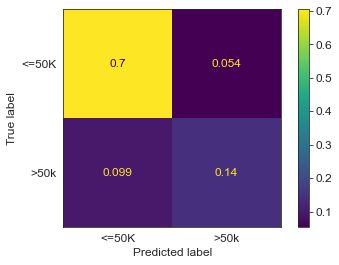

In [97]:
ConfusionMatrix(y_test, predictions_df['Predictions'][0]) # Confusion Matrix - KNN

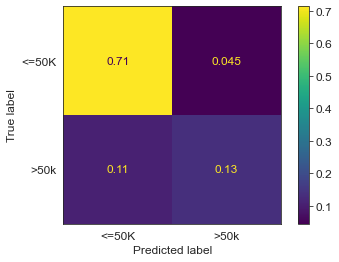

In [98]:
ConfusionMatrix(y_test, predictions_df['Predictions'][1]) # Confusion Matrix - SVM

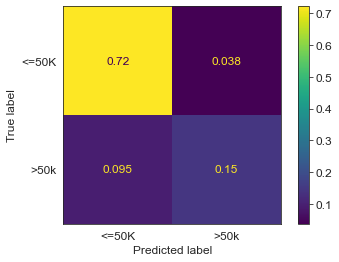

In [99]:
ConfusionMatrix(y_test, predictions_df['Predictions'][2]) # Confusion Matrix - RF

KNN ROC AUC=0.888


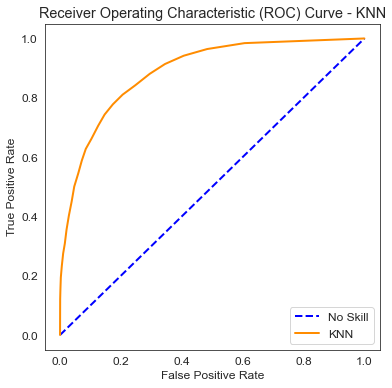

In [100]:
ROCCurve('KNN', predictions_df['Prediction-Probability'][0], y_test) # ROC Curve - KNN

SVM ROC AUC=0.890


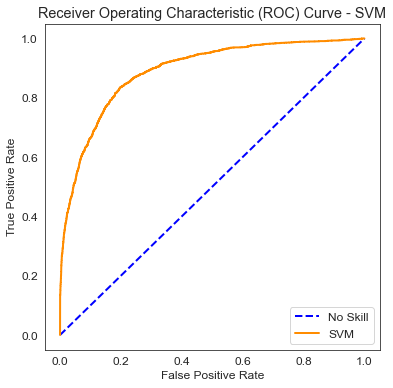

In [101]:
ROCCurve('SVM',predictions_df['Prediction-Probability'][1], y_test) # ROC Curve - SVM

RF ROC AUC=0.917


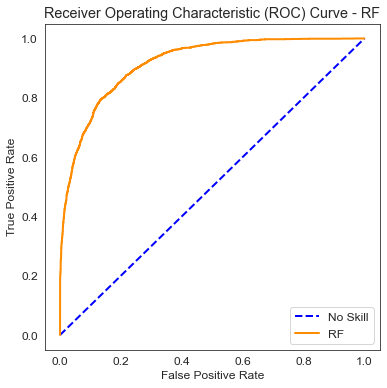

In [102]:
ROCCurve('RF',predictions_df['Prediction-Probability'][2], y_test) # ROC Curve - RF

                                                    End of File